## 1. Importing and installing necessary Libraries

In [9]:
pip install eli5

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
from sklearn.metrics import r2_score,accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation

import pylab
import eli5 #for permutation importance
from eli5.sklearn import PermutationImportance


import pylab
import eli5 #for permutation importance
from eli5.sklearn import PermutationImportance
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Reading the dataset

In [162]:
train_set = pd.read_csv('training.csv')
test_set = pd.read_csv('testing.csv')


In [163]:
nRow,nCol=train_set.shape
print(f'**Summary**:\n There are {nRow} rows and {nCol} columns. Prognosis is the target/label variable.')

**Summary**:
 There are 4920 rows and 134 columns. Prognosis is the target/label variable.


In [164]:
train_set['prognosis'].value_counts()

Pneumonia                                  120
Allergy                                    120
Hypoglycemia                               120
Hepatitis B                                120
AIDS                                       120
Hepatitis E                                120
Common Cold                                120
Urinary tract infection                    120
Varicose veins                             120
Typhoid                                    120
Gastroenteritis                            120
Acne                                       120
Fungal infection                           120
Paralysis (brain hemorrhage)               120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypertension                               120
Arthritis                                  120
Chicken pox                                120
Chronic cholestasis                        120
Jaundice                                   120
Impetigo     

In [165]:
print(f'**Summary**:\n There are 41 diseases in the dataset and each containing 120 rows. So, the dataset is equally balanced.')

**Summary**:
 There are 41 diseases in the dataset and each containing 120 rows. So, the dataset is equally balanced.


## 2. Data Cleaning Process begins:

#### 2.a. Checking for missing data points, NA's, and NAN values

In [166]:
# Get the number of missing data points, NA's ,NAN's values per column
total = train_set.isnull().sum().sort_values(ascending=False)
percent = (train_set.isnull().sum()/train_set.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

total = train_set.isna().sum().sort_values(ascending=False)
percent = (train_set.isna().sum()/train_set.isna().count()).sort_values(ascending=False)
na_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

if((na_data.all()).all()>0 or (na_data.all()).all()>0):
     print('Found Missing Data or NA values')
        
else:
    print('There is no missing data or null values in the collected data. Additionally, the length of each column is same.')

There is no missing data or null values in the collected data. Additionally, the length of each column is same.


#### 2.b. Checking for the outliers

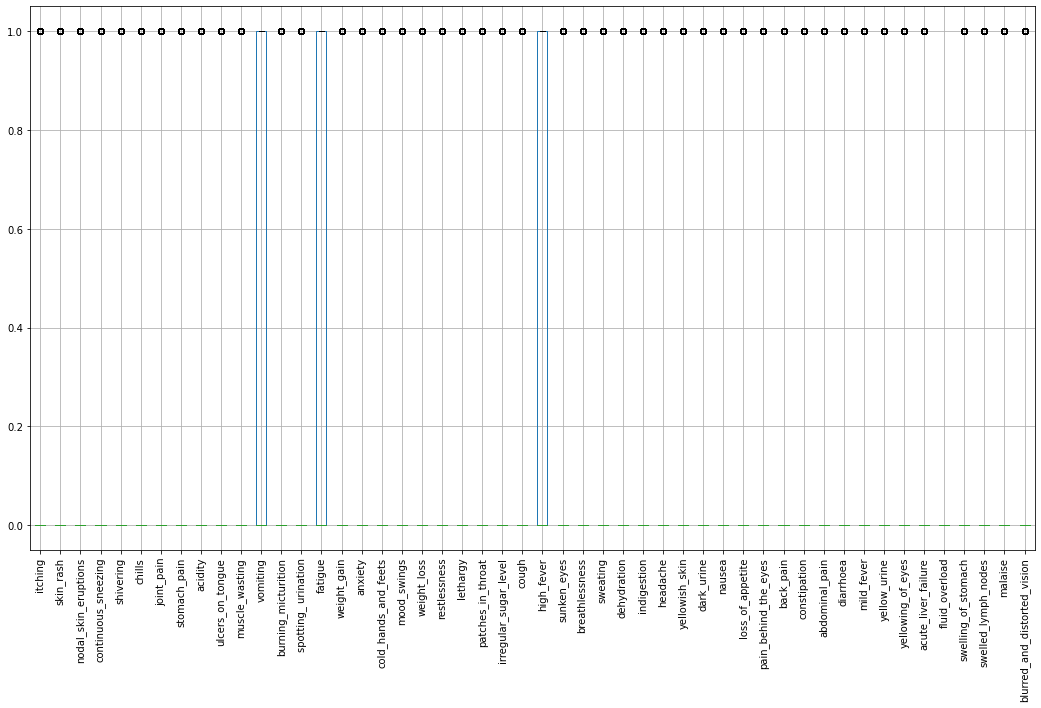

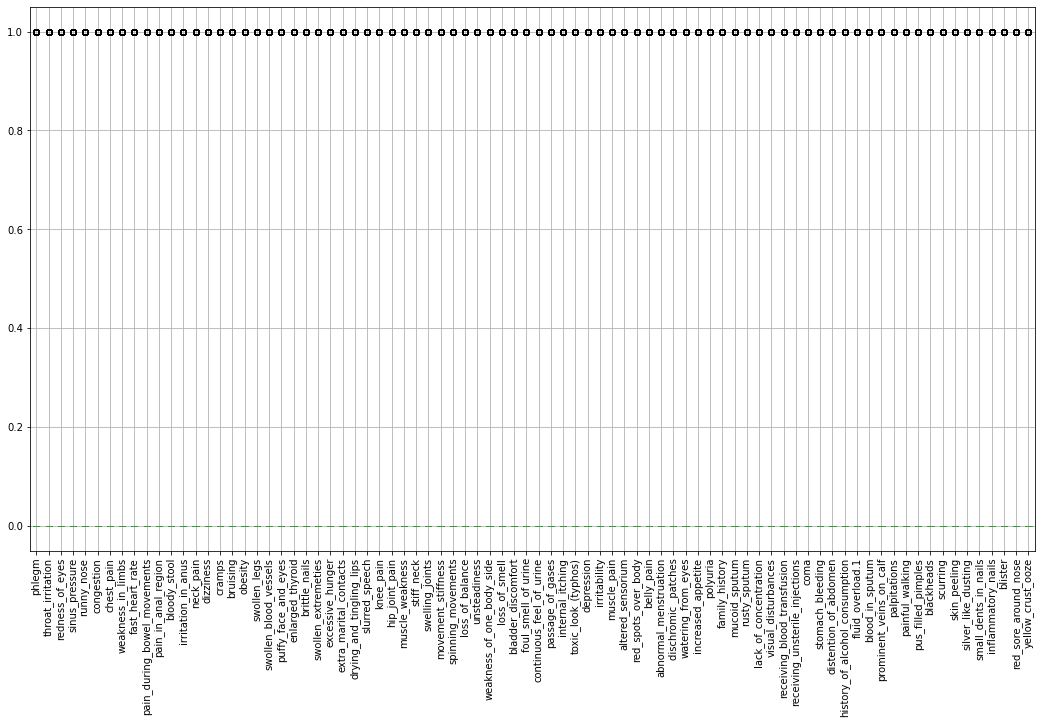

**Summary**:
 No outliers


In [18]:
temp_df=train_set.iloc[:,:-1]
#Detect outliers
plt.subplots(figsize=(18,10))
temp_df.iloc[:,:50].boxplot()
plt.xticks(rotation=90)
plt.show()

plt.subplots(figsize=(18,10))
temp_df.iloc[:,50:].boxplot()
plt.xticks(rotation=90)
plt.show()

print(f'**Summary**:\n No outliers')

#### 2.c. Plotting the heat map for checking the multicollinearity 

<AxesSubplot:>

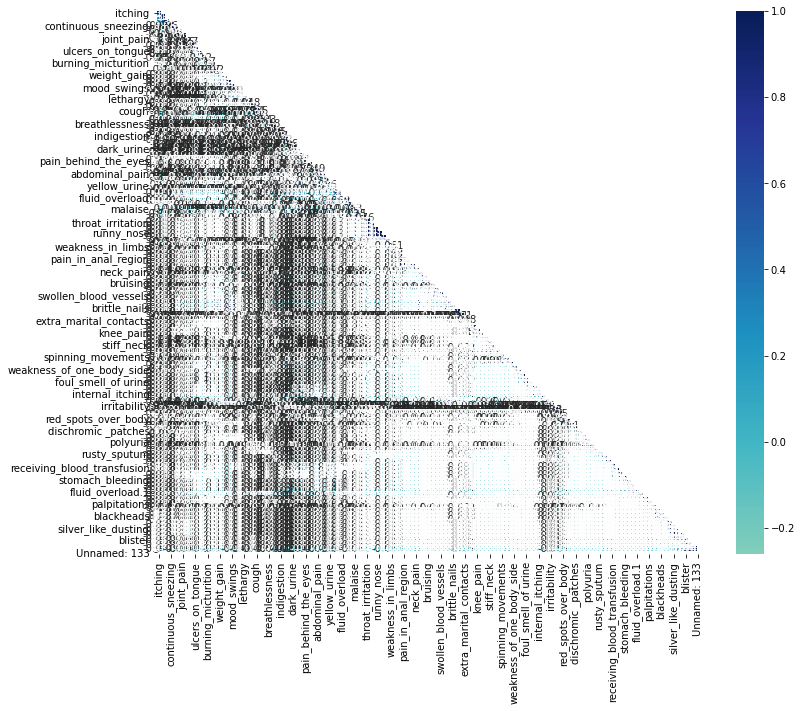

In [19]:
plt.figure(figsize=(13, 10))

mask_upper_triangle = np.triu(np.ones_like(train_set.corr(), dtype=bool), k=1)

sns.heatmap(train_set.corr(), cmap="YlGnBu", annot=True, mask=mask_upper_triangle,
            square=True, center = 0 )

#### 2.d. Checking for the NaN values after collinearity and removing the irrelevant features further

In [167]:
corr_matrix=train_set.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
itching,NaN,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,NaN
skin_rash,NaN,NaN,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,NaN
nodal_skin_eruptions,NaN,NaN,NaN,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,NaN
continuous_sneezing,NaN,NaN,NaN,NaN,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,NaN
shivering,NaN,NaN,NaN,NaN,NaN,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.023720,-0.023720,-0.023720,NaN
blister,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946120,0.946120,NaN
red_sore_around_nose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946120,NaN
yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.e. Checking for any unnamed columns in the dataset and removing them

In [168]:
# Checking for the NAs in both training and testing dataset
def plot_nas(df: pd.DataFrame):
    if train_set.isnull().sum().sum() != 0:
        na_df = (train_set.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')

Training Set


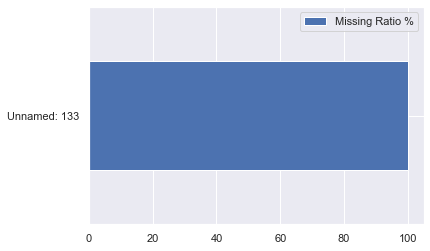




Test Set


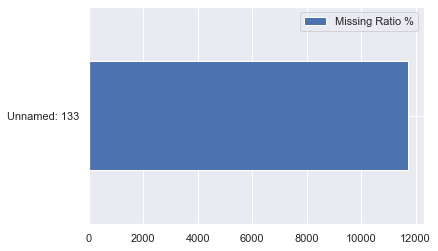

In [169]:
print("Training Set")
plot_nas(train_set)
print("\n\n")
print("Test Set")
plot_nas(test_set)

In [170]:
train_set= train_set.drop(['Unnamed: 133'], axis = 1)
train_set

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [171]:
test_set

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


#### 2.f. Removing the multicollinear columns

In [172]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop,len(to_drop))

train_set=train_set.drop(to_drop, axis=1)
test_set=test_set.drop(to_drop, axis=1)

['cold_hands_and_feets', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'bruising', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'drying_and_tingling_lips', 'slurred_speech', 'hip_joint_pain', 'unsteadiness', 'loss_of_smell', 'continuous_feel_of_urine', 'internal_itching', 'altered_sensorium', 'belly_pain', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'red_sore_around_nose', 'yellow_crust_ooze'] 42


#### 2.g. Checking the threshold variance

In [173]:
# using sklearn variance threshold to find constant features
temp_train=train_set.iloc[:,:-1]

from sklearn.feature_selection import VarianceThreshold


sel = VarianceThreshold(threshold=0.03)
sel.fit(temp_train)

VarianceThreshold(threshold=0.03)

#### 2.h. Calculating the VIF(Varience Inflation Factor)

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(train_set, thresh=10):
    cols = train_set.columns
    variables = np.arange(train_set.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = train_set[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + train_set[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(train_set.columns[variables])
    return train_set[cols[variables]]

# calculate_vif_(X)

In [176]:
print(
    len([
        x for x in temp_train.columns
        if x not in temp_train.columns[sel.get_support()]
    ]))

to_drop=[x for x in temp_train.columns if x not in temp_train.columns[sel.get_support()]]
train_set=train_set.drop(to_drop, axis=1)
test_set=test_set.drop(to_drop, axis=1)

41


#### 2.i. Label encoding for categorical data i.i Prognosis(target variable) to numerical variable

In [177]:
encoder = LabelEncoder()
train_set["prognosis"] = encoder.fit_transform(train_set["prognosis"])
test_set["prognosis"] = encoder.transform(test_set["prognosis"])

#### 2.j. Splitting the dataset into train and test

In [112]:
X_train, X_valid, y_train, y_valid = train_test_split(train_set.drop('prognosis', 1), train_set['prognosis'], test_size = .4, random_state=42,shuffle=True)

In [113]:
X_train.shape

(2952, 49)

In [115]:
test_set = pd.concat([test_set,pd.concat([X_valid,y_valid],axis=1)],axis=0)
test_set.shape

(3978, 50)

In [76]:
test_set=test_set.iloc[:,:-1] 
test_set

,itching,skin_rash,continuous_sneezing,chills,joint_pain,stomach_pain,acidity,vomiting,burning_micturition,fatigue,...,excessive_hunger,muscle_weakness,stiff_neck,swelling_joints,loss_of_balance,depression,irritability,muscle_pain,red_spots_over_body,family_history
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4237,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3443,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1398,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## 3. Classification Model algorithm application for accuracy calculation:

#### 3.a. Logistic Regressioin:

In [116]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression()

lr.fit(X_train, y_train)

# y_pred = lr.predict(X_train_selected)
# X = sm.add_constant(X_train_selected)
# lr = sm.OLS(Y_test, X_train_selected).fit()

# evaluate accuracy of classifier
accuracy = lr.score(X_train, y_train)
print('Accuracy:', accuracy)


Accuracy: 0.9854336043360433


#### The logistic regression model gives Accuracy of 98.5%

Text(0.5, 637.6, 'Predicted label')

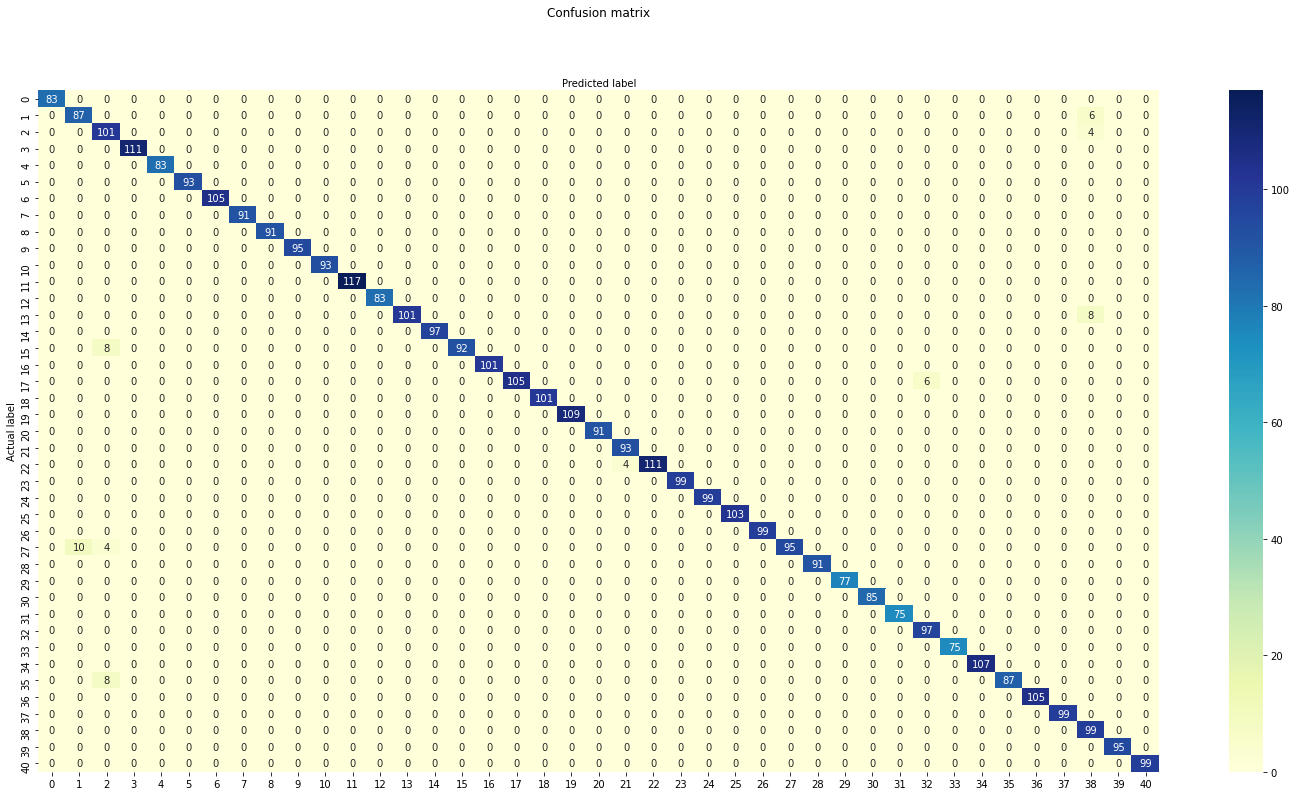

In [118]:
# Plotting the confusion matrix

y_pred = lr.predict(test_set.iloc[:,:-1])
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [119]:
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       0.90      0.94      0.92        93
           2       0.83      0.96      0.89       105
           3       1.00      1.00      1.00       111
           4       1.00      1.00      1.00        83
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00       105
           7       1.00      1.00      1.00        91
           8       1.00      1.00      1.00        91
           9       1.00      1.00      1.00        95
          10       1.00      1.00      1.00        93
          11       1.00      1.00      1.00       117
          12       1.00      1.00      1.00        83
          13       1.00      0.93      0.96       109
          14       1.00      1.00      1.00        97
          15       1.00      0.92      0.96       100
          16       1.00      1.00      1.00       101
          17       1.00    

#### 3.b. Decision Tree:

In [120]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Decision Tree Train score with ",format(dt.score(X_train, y_train)))

Decision Tree Train score with  0.9854336043360433


In [121]:
print("Decision Tree Test score with ",format(dt.score(test_set.iloc[:,:-1], test_set['prognosis'])))

Decision Tree Test score with  0.9821518350930115


#### The Decision tree model gives accuracy of: 98.2%

Text(0.5, 637.6, 'Predicted label')

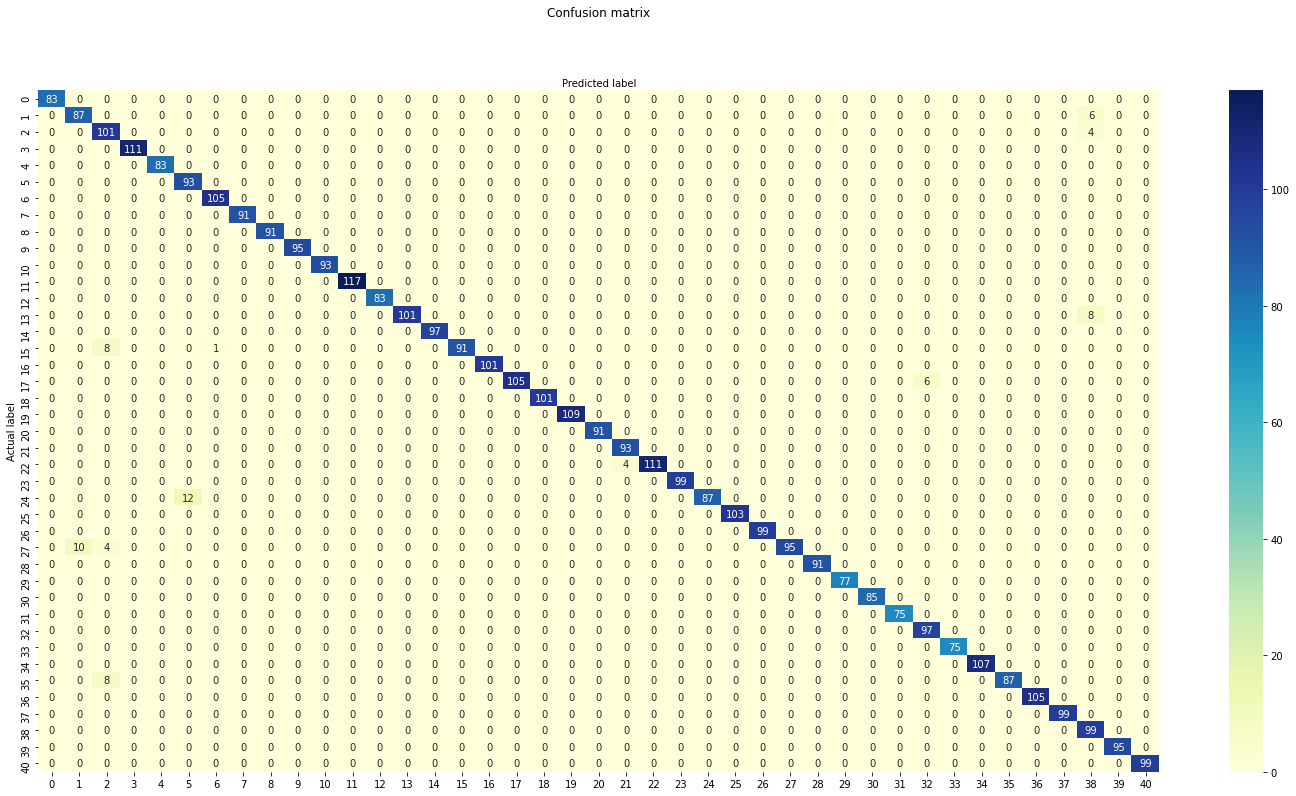

In [122]:
# Decision tree Confusion matrix
y_pred = dt.predict(test_set.iloc[:,:-1])
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [123]:
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       0.90      0.94      0.92        93
           2       0.83      0.96      0.89       105
           3       1.00      1.00      1.00       111
           4       1.00      1.00      1.00        83
           5       0.89      1.00      0.94        93
           6       0.99      1.00      1.00       105
           7       1.00      1.00      1.00        91
           8       1.00      1.00      1.00        91
           9       1.00      1.00      1.00        95
          10       1.00      1.00      1.00        93
          11       1.00      1.00      1.00       117
          12       1.00      1.00      1.00        83
          13       1.00      0.93      0.96       109
          14       1.00      1.00      1.00        97
          15       1.00      0.91      0.95       100
          16       1.00      1.00      1.00       101
          17       1.00    

In [153]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X_train.columns)

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Above is the decision tree generated

#### 3.c. Random forest:

In [124]:
rf = RandomForestClassifier(max_depth=6,oob_score=True,random_state=42,criterion='entropy',max_features='auto',n_estimators=300)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_valid)
print("Random Forest Train score with ",format(rf.score(X_train, y_train)))

Random Forest Train score with  0.9773035230352304


In [125]:
print("Random Forest Test score with ",format(rf.score(test_set.iloc[:,:-1], test_set['prognosis'])))

Random Forest Test score with  0.9793866264454499


#### TheRandom forest tree model gives accuracy of: 97.9%

In [154]:
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(X_train, y_train);

rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)# Extract the small tree
tree_small = rf_small.estimators_[5]# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = features, rounded = True, precision = 1)
(graph, ) =pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

#### 3.d. SVM (Support Vector Machine)

In [128]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred=svm.predict(X_valid)
print("SVM Train score with ",format(svm.score(X_train, y_train)))

SVM Train score with  0.9854336043360433


#### The SVM model gives accuracy of: 98.54%

In [133]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')        # creates an instance of SVM with a radial basis function (RBF) kernel.
svclassifier.fit(X_train, y_train)
y_pred=svm.predict(X_valid)
print("SVM Train score with ",format(svm.score(X_train, y_train)))

SVM Train score with  0.9854336043360433


In [138]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion_matrix :\n",confusion_matrix(y_valid,y_pred))
print("Classification_report :\n",classification_report(y_valid,y_pred))
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Confusion_matrix :
 [[41  0  0 ...  0  0  0]
 [ 0 43  0 ...  3  0  0]
 [ 0  0 50 ...  2  0  0]
 ...
 [ 0  0  0 ... 49  0  0]
 [ 0  0  0 ...  0 47  0]
 [ 0  0  0 ...  0  0 49]]
Classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.90      0.93      0.91        46
           2       0.83      0.96      0.89        52
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        45
           8       1.00      1.00      1.00        45
           9       1.00      1.00      1.00        47
          10       1.00      1.00      1.00        46
          11       1.00      1.00      1.00        58
          12       1.00      1.00      1.00        41
          13       1.00      0.93      0.9

In [140]:
# Using the Polynomial SVM kernel
svclassifier = SVC(kernel='poly', degree=6,gamma ='auto')
svclassifier.fit(X_train, y_train)
y_pred=svm.predict(X_valid)
print("SVM Train score with ",format(svm.score(X_train, y_train)))

SVM Train score with  0.9854336043360433


In [141]:
print("Confusion_matrix :\n",confusion_matrix(y_valid,y_pred))
print("Classification_report :\n",classification_report(y_valid,y_pred))
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Confusion_matrix :
 [[41  0  0 ...  0  0  0]
 [ 0 43  0 ...  3  0  0]
 [ 0  0 50 ...  2  0  0]
 ...
 [ 0  0  0 ... 49  0  0]
 [ 0  0  0 ...  0 47  0]
 [ 0  0  0 ...  0  0 49]]
Classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.90      0.93      0.91        46
           2       0.83      0.96      0.89        52
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        45
           8       1.00      1.00      1.00        45
           9       1.00      1.00      1.00        47
          10       1.00      1.00      1.00        46
          11       1.00      1.00      1.00        58
          12       1.00      1.00      1.00        41
          13       1.00      0.93      0.9

In [143]:
# Using the Linear SVM Kernel
clf = SVC(kernel='linear', C = 100, random_state = 0)
clf.fit(X_train, y_train)
y_pred=svm.predict(X_valid)
print("SVM Train score with ",format(svm.score(X_train, y_train)))


SVM Train score with  0.9854336043360433


In [144]:
print("Confusion_matrix :\n",confusion_matrix(y_valid,y_pred))
print("Classification_report :\n",classification_report(y_valid,y_pred))
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Confusion_matrix :
 [[41  0  0 ...  0  0  0]
 [ 0 43  0 ...  3  0  0]
 [ 0  0 50 ...  2  0  0]
 ...
 [ 0  0  0 ... 49  0  0]
 [ 0  0  0 ...  0 47  0]
 [ 0  0  0 ...  0  0 49]]
Classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.90      0.93      0.91        46
           2       0.83      0.96      0.89        52
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        45
           8       1.00      1.00      1.00        45
           9       1.00      1.00      1.00        47
          10       1.00      1.00      1.00        46
          11       1.00      1.00      1.00        58
          12       1.00      1.00      1.00        41
          13       1.00      0.93      0.9

#### 3.e. Naive Bayes

In [130]:
# Using the Gaussian Kernel
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred=bayes.predict(X_valid)
print("Naive Bayes Train score with ",format(bayes.score(X_train, y_train)))

Naive Bayes Train score with  0.967140921409214


#### The Accuracy for Nive Bayes Algorithm is 96.7%

In [131]:
print("Naive Bayes Test score with ",format(bayes.score(test_set.iloc[:,:-1], test_set['prognosis'])),'%')

Naive Bayes Test score with  0.9670688788335847 %


In [181]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

scaler=MinMaxScaler();
scaler=scaler.fit(X_train)

scaledData=scaler.transform(X_train)

#now create the scaled dataframe from it
dss=pd.DataFrame(scaledData,columns=X_train.columns)

In [182]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dss)
    Sum_of_squared_distances.append(km.inertia_)

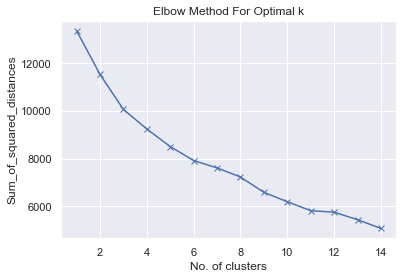

In [183]:
# Plotted Elbow method for KNN

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [184]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 15), Sum_of_squared_distances, curve="convex", direction="decreasing")
kl.elbow


9

This gave effective value as 9

In [185]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
k = 9  # number of nearest neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# predict class labels for test set
y_pred = knn.predict(X_valid)

# evaluate performance using precision, recall, F1-score, and AUC-ROC
print('Classification report:\n', classification_report(y_valid, y_pred))
#print('AUC-ROC score:', roc_auc_score(y_valid, y_pred))
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.90      0.93      0.91        46
           2       0.83      0.96      0.89        52
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        45
           8       1.00      1.00      1.00        45
           9       1.00      1.00      1.00        47
          10       1.00      1.00      1.00        46
          11       1.00      1.00      1.00        58
          12       1.00      1.00      1.00        41
          13       1.00      0.93      0.96        54
          14       1.00      1.00      1.00        48
          15       1.00      0.92      0.96        49
          16       1.00      1.00      1.00        50
   

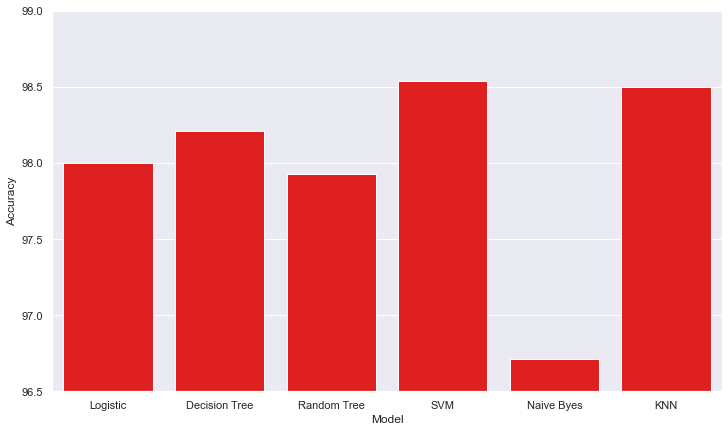

In [187]:
sns.set(style="darkgrid")

acc = pd.DataFrame({'Model':['Logistic','Decision Tree','Random Tree','SVM','Naive Byes','KNN'],'Accuracy':[98,98.21,97.93,98.54,96.71,98.5]})

# Set the figure size
fig, ax =  plt.subplots(figsize=(12, 7))
ax.set_ylim(96.5, 99)
# plot a bar chart
sns.barplot(
    x="Model", 
    y="Accuracy", 
    data=acc,  
    ci=None, 
    color='#FF0000',
    orient = 'v');
plt.show()

## The Effective Model Comparison